# Project: Wrangle and Analyze Data

by Gerrit Tombrink

# Introduction

The goal of this project is to wrangle, analyse, and visualize 'WeRateDogs' Twitter data in combination with additional prediction and Twitter datasets, downloaded via a URL and a Twitter API. This project is part of the Data Analyst Nanodegree, created by Udacity.

In [16]:
# import libraries
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## Gathering datasets

During this Wrangling Data Project, we have to import three different sources (please, see details of this nanodegree project at Udacity).

### Gathering of the first dataset (twitter_data)

In [17]:
# import first dataset
twitter_data = pd.read_csv("twitter-archive-enhanced.csv")

# print first dataset
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Gathering of the second dataset (predic_data)

In [143]:
# create folder
folder = "image_prediction"
if not os.path.exists(folder):
    os.makedirs(folder)

# import second dataset    
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"    
response = requests.get(url)
response

<Response [200]>

In [145]:
# save and open url file
with open(os.path.join(folder, url.split("/")[-1]), mode="wb") as file:
    file.write(response.content)

predic_data = pd.read_csv("image_prediction/image-predictions.tsv", sep='\t')    

predic_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Gathering of the third dataset (tweet_data)

In [5]:
# implement twitter keys for import
consumer_key = ############
consumer_secret = ############
access_token = ############
access_secret = ############

# import third dataset
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [16]:
# import and save dataset from twitter as a file
with open('tweet_json.txt', 'w', encoding='utf8') as output:
    for tweet_id in twitter_data["tweet_id"]:
        try:
            status = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(status._json, output)
            output.write('\n')
        except: 
            print("The following tweet-id is missing: {}.".format(tweet_id))

The following tweet-id is missing: 888202515573088257.
The following tweet-id is missing: 873697596434513921.
The following tweet-id is missing: 869988702071779329.
The following tweet-id is missing: 866816280283807744.
The following tweet-id is missing: 861769973181624320.
The following tweet-id is missing: 856282028240666624.
The following tweet-id is missing: 845459076796616705.
The following tweet-id is missing: 842892208864923648.
The following tweet-id is missing: 837012587749474308.
The following tweet-id is missing: 827228250799742977.
The following tweet-id is missing: 802247111496568832.
The following tweet-id is missing: 775096608509886464.
The following tweet-id is missing: 771004394259247104.
The following tweet-id is missing: 770743923962707968.


Rate limit reached. Sleeping for: 640


The following tweet-id is missing: 758740312047005698.
The following tweet-id is missing: 754011816964026368.


Rate limit reached. Sleeping for: 641


The following tweet-id is missing: 676957860086095872.
The following tweet-id is missing: 674774481756377088.


In [21]:
tweets = []

# open file and implement each line into a list
with open('tweet_json.txt', 'r') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            tweets.append(tweet)
        except:
            print("Error")

In [22]:
# implement list into pandas dataframe
tweet_data = pd.DataFrame(tweets)

In [8]:
tweet_data

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38519,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8495,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33026,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6244,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24855,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4139,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41909,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8617,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40056,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9351,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20087,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,3101,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11761,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,2060,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",65071,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,18827,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27625,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,4253,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31704,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,7375,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing datasets

We have to detect and document at least eight (8) quality issues and two (2) tidiness issues (please, see details of this nanodegree project at Udacity).   

### Visual Assessment

#### Assesing of the first dataset (twitter_data)

In [23]:
# print dataset to get an overview
twitter_data

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### Quality Issues of the first dataset (twitter_data):
- Some dog names within the column "name" are misspelt or missing. We can use the dog names within the text of the column "text" as a second reference.



##### Tidyness Issues of the first dataset (twitter_data):
- Merge all four dog stages of the columns "doggo", "floofer", "pupper" and "puppo" into one stage column.

#### Assesing of the second dataset

In [24]:
# print dataset to get an overview
predic_data

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


##### Quality Issues of the second dataset (predic_data):

- We need to make the spelling of the dog breeds within the column "p1" consistent.
- We need to make the spelling of the dog breeds within the column "p2" consistent.
- We need to make the spelling of the dog breeds within the column "p3" consistent.
- We have to delete the _ between each word of the columns "p1", "p2" and "p3".

##### Tidyness Issues of the second dataset (predic_data):
- Join this dataset of "predic_data" with the dataset of "twitter_data".

#### Assesing of the third dataset (tweet_data)

In [25]:
# print dataset to get an overview
tweet_data.head(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38519,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8495,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33026,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6244,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24855,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4139,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41909,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8617,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40056,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9351,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,None,None,Sat Jul 29 00:08:17 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20087,False,Here we have a majestic great white breaching ...,None,...,NaN,NaN,NaN,NaN,3101,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,None,None,Fri Jul 28 16:27:12 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",11761,False,Meet Jax. He enjoys ice cream so much he gets ...,None,...,NaN,NaN,NaN,NaN,2060,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,None,None,Fri Jul 28 00:22:40 +0000 2017,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",65071,False,When you watch your owner call another dog a g...,None,...,NaN,NaN,NaN,NaN,18827,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,None,None,Thu Jul 27 16:25:51 +0000 2017,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",27625,False,This is Zoey. She doesn't want to be one of th...,None,...,NaN,NaN,NaN,NaN,4253,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,None,None,Wed Jul 26 15:59:51 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",31704,False,This is Cassie. She is a college pup. Studying...,None,...,NaN,NaN,NaN,NaN,7375,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


##### Tidyness Issues of the third dataset (tweet_data):
- Join this dataset of "tweet_data" with the dataset of "twitter_data".

### Programmatic Assessment

#### Assesing of the first dataset (twitter_data)

In [26]:
# print first rows of dataset
twitter_data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [27]:
# print data-infos of dataset
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [28]:
# print NULL data of the column "expanded_urls"
twitter_data[twitter_data["expanded_urls"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [29]:
# print duplicates of tweet_id
twitter_data[twitter_data.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [30]:
# print dog names within the column "names"
twitter_data["name"].sort_values

<bound method Series.sort_values of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        

In [31]:
# print statistics of dataset
twitter_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


##### Quality Issues of the first dataset (twitter_data):

- 181 retweeted records (see column "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp") should be deleted from the dataset.
- A wrong data type of the column "timestamp". This column should be converted to a datetime object.
- Missing values within the columns "expanded_urls", "in_reply_to_status_id" and "in_reply_to_user_id".  

#### Assesing of the second dataset (predic_data)

In [32]:
# print first rows of dataset
predic_data.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [33]:
# print data-infos of dataset
predic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
# print duplicates of tweet_id
predic_data[predic_data.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [35]:
# print statistics of dataset
predic_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assesing of the third dataset (tweet_data)

In [36]:
# print first rows of dataset
tweet_data.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38519,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8495,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33026,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6244,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24855,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4139,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41909,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8617,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",40056,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9351,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [37]:
# print data-infos of dataset
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2338 non-null object
display_text_range               2338 non-null object
entities                         2338 non-null object
extended_entities                2063 non-null object
favorite_count                   2338 non-null int64
favorited                        2338 non-null bool
full_text                        2338 non-null object
geo                              0 non-null object
id                               2338 non-null int64
id_str                           2338 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [38]:
# print duplicates of id
tweet_data[tweet_data.id.duplicated()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [39]:
# print statistics of dataset
tweet_data.describe()

,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,quoted_status_id,retweet_count
count,2338.000000,2.338000e+03,7.800000e+01,7.800000e+01,2.600000e+01,2338.000000
mean,8031.928571,7.422656e+17,7.455079e+17,2.014171e+16,8.113972e+17,2982.261762
std,12207.371179,6.836405e+16,7.582492e+16,1.252797e+17,6.295843e+16,4947.785619
min,0.000000,6.660209e+17,6.658147e+17,1.185634e+07,6.721083e+17,0.000000
25%,1394.500000,6.783824e+17,6.757419e+17,3.086374e+08,7.761338e+17,600.250000
50%,3513.500000,7.186224e+17,7.038708e+17,4.196984e+09,8.281173e+17,1396.000000
75%,9892.500000,7.987010e+17,8.257804e+17,4.196984e+09,8.637581e+17,3480.500000
max,142274.000000,8.924206e+17,8.862664e+17,8.405479e+17,8.860534e+17,76648.000000


##### Quality Issues of the third dataset (tweet_data):

- 168 retweeted records (see column "retweeted_status") should be deleted from the dataset.
- The columns "contributors", "coordinates", "geo", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "place", "quoted_status", "quoted_status_id", "quoted_status_id_str", "quoted_status_permalink" should be deleted from the dataset, because they have to many missing values.
- Change the name of the column "id" into "tweet_id" to make the dataset consistent. 

## Summary of all issues

##### Quality Issues

First dataset (twitter_data):
- Some dog names within the column "name" are misspelt or missing. We can use the dog names within the text of the column "text" as a second reference.
- 181 retweeted records (see column "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp") should be deleted from the dataset.
- A wrong data type of the column "timestamp". This column should be converted to a datetime object.
- Missing values within the columns "expanded_urls", "in_reply_to_status_id" and "in_reply_to_user_id".

Second dataset (predic_data):
- We need to make the spelling of the dog breeds within the column "p1" consistent.
- We need to make the spelling of the dog breeds within the column "p2" consistent.
- We need to make the spelling of the dog breeds within the column "p3" consistent.
- We have to delete the _ between each word of the columns "p1", "p2" and "p3".
- We have to round the values of the columns "p1_conf", "p2_conf" and "p3_conf".

Third dataset (tweet_data):
- 168 retweeted records (see column "retweeted_status") should be deleted from the dataset.
- The columns "contributors", "coordinates", "extended_entities", "geo", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "place", "possibly_sensitive", "possibly_sensitive_appealable", "quoted_status", "quoted_status_id", "quoted_status_id_str" and "quoted_status_permalink" should be deleted from the dataset, because they have to many missing values.
- Change the name of the column "id" into "tweet_id" to make the dataset consistent.     
    
    
##### Tidyness Issues

First dataset (twitter_data):
- Merge all four dog stages of the columns "doggo", "floofer", "pupper" and "puppo" into one stage column.

All datasets:
- Join the second (predic_data) and third (tweet_data) dataset into the first dataset (twitter_data).

## Cleaning datasets

We have to clean (define, code and test) each of the issues documented above (please, see details of this nanodegree project at Udacity).  

In [40]:
# copy of all datasets
twitter_data_clean = twitter_data.copy()
predic_data_clean = predic_data.copy()
tweet_data_clean = tweet_data.copy()

#### Cleaning first dataset (twitter_data)

##### Define
- Find and replace wrong dog names within the column "name" with "None".

##### Code

In [41]:
# print dog names 
twitter_data_clean["name"].sort_values

<bound method Series.sort_values of 0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        

In [42]:
# print selected dog names 
twitter_data_clean[twitter_data_clean.name != "None"]["name"].sort_values

<bound method Series.sort_values of 0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Canela
20          Gerald
21         Jeffrey
22            such
23          Canela
26            Maya
27          Mingus
28           Derek
29          Roscoe
31         Waffles
33           Jimbo
34          Maisey
36           Lilly
38            Earl
           ...    
2297          Dave
2300          Keet
2302        Klevin
2303         Carll
2304             a
2308          Jeph
2309       Jockson
2311             a
2312         Josep
2313         Lugan
2314             a
2315    Christoper
2317       Jimothy
2318      Kreggory
2319         Scout
2325        Walter
2326         quite
2327             a
2333            an
2334          

In [43]:
# replace wrong dog names with the value "None"
twitter_data_clean["name"].replace(to_replace=r'^[a-z]+$', value="None", inplace=True, regex=True)
twitter_data_clean["name"].replace(to_replace=r'^(.)\1*$', value="None", inplace=True, regex=True)

##### Test

In [44]:
# print dog names
twitter_data_clean["name"]

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

In [45]:
# print selected dog names
twitter_data_clean[twitter_data_clean.name != "None"]["name"].sort_values

<bound method Series.sort_values of 0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Canela
20          Gerald
21         Jeffrey
23          Canela
26            Maya
27          Mingus
28           Derek
29          Roscoe
31         Waffles
33           Jimbo
34          Maisey
36           Lilly
38            Earl
39            Lola
           ...    
2268          Dook
2270          Hall
2271      Philippe
2274         Reese
2275       Cupcake
2279         Biden
2280          Fwed
2282     Genevieve
2283        Joshwa
2286       Timison
2289      Clarence
2290       Kenneth
2291       Churlie
2292       Bradlay
2293         Pipsy
2295          Gabe
2296         Clybe
2297          Dave
2300          Keet
2302        Kl

In [46]:
# print selected dog names
twitter_data_clean[twitter_data_clean.name == "O"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Define
- Find and delete 181 retweeted records within the columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp".

##### Code

In [47]:
# print info table
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [48]:
# print data of retweeted records
twitter_data_clean[twitter_data_clean.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [49]:
# delete retweeted values
twitter_data_clean.drop(twitter_data_clean[twitter_data_clean.retweeted_status_id.isnull() == False].index, inplace = True)

In [50]:
# print data of retweeted records
twitter_data_clean[twitter_data_clean.retweeted_status_id.isnull() == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [51]:
# drop columns
twitter_data_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], axis=1, inplace=True)

##### Test

In [52]:
# test data 
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


##### Define
- Change data type of the column "timestamp" into a datetime object.

##### Code

In [53]:
# change data type into a datetime object
twitter_data_clean["timestamp"] = pd.to_datetime(twitter_data_clean["timestamp"])

##### Test

In [54]:
# test timestamp column
twitter_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [55]:
# test timestamp column
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


##### Define
- Fill in missing values within the columns "expanded_urls", "in_reply_to_status_id" and "in_reply_to_user_id" with the string "None" or float "0".

##### Code

In [56]:
# print isnull values of column
twitter_data_clean[twitter_data_clean["expanded_urls"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,666,10,None,None,None,None,None
218,850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,13,10,None,None,None,None,None


In [57]:
# print isnull values of column
twitter_data_clean[twitter_data_clean["in_reply_to_status_id"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [58]:
# print isnull values of column
twitter_data_clean[twitter_data_clean["in_reply_to_status_id"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [59]:
# print isnull values of column
twitter_data_clean[twitter_data_clean["in_reply_to_user_id"].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [60]:
# fill missing values with None
twitter_data_clean["expanded_urls"].fillna(value="None", inplace=True)

In [61]:
# fill missing values with 0
twitter_data_clean["in_reply_to_status_id"].fillna(value="0", inplace=True)

In [62]:
## fill missing values with 0
twitter_data_clean["in_reply_to_user_id"].fillna(value="0", inplace=True)

##### Test

In [63]:
# print info table
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 254.9+ KB


In [64]:
# test expanded_urls values
twitter_data_clean[twitter_data_clean.expanded_urls == "None"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.86266e+17,2.28118e+09,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None,12,10,None,None,None,None,None
55,881633300179243008,8.81607e+17,4.73844e+07,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,None,17,10,None,None,None,None,None
64,879674319642796034,8.79554e+17,3.10544e+09,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,None,14,10,None,None,None,None,None
113,870726314365509632,8.70726e+17,1.64878e+07,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,None,10,10,None,None,None,None,None
148,863427515083354112,8.63426e+17,7.75962e+07,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,None,12,10,None,None,None,None,None
179,857214891891077121,8.57157e+17,1.80671e+08,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,None,12,10,None,None,None,None,None
186,856288084350160898,8.56286e+17,2.79281e+08,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,None,14,10,None,None,None,None,None
188,855862651834028034,8.55862e+17,1.94352e+08,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,None,420,10,None,None,None,None,None
189,855860136149123072,8.55859e+17,1.36157e+07,2017-04-22 19:05:32,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,None,666,10,None,None,None,None,None
218,850333567704068097,8.50329e+17,2.19551e+07,2017-04-07 13:04:55,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,None,13,10,None,None,None,None,None


In [65]:
# test in_reply_to_status_id values
twitter_data_clean[twitter_data_clean.in_reply_to_status_id == "0"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,0,0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,0,0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,0,0,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [66]:
# test in_reply_to_user_id
twitter_data_clean[twitter_data_clean.in_reply_to_user_id == "0"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,0,0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,0,0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,0,0,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


##### Define
- Merge all four dog stages of the columns "doggo", "floofer", "pupper" and "puppo" into one stage column.

##### Code

In [67]:
# print dataset
twitter_data_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [68]:
# join columns
twitter_data_clean["stage"] = twitter_data_clean[["doggo", "floofer", "pupper", "puppo" ]].apply(lambda x: ''.join(x.astype(str)), axis=1)

In [69]:
# replace multiple data in column "stage"
twitter_data_clean["stage"].replace("doggoNoneNoneNone", "doggo", inplace=True)
twitter_data_clean["stage"].replace("NoneflooferNoneNone", "floofer", inplace=True)
twitter_data_clean["stage"].replace("NoneNonepupperNone", "pupper", inplace=True)
twitter_data_clean["stage"].replace("NoneNoneNonepuppo", "puppo", inplace=True)
twitter_data_clean["stage"].replace("NoneNoneNoneNone", "None", inplace=True)

# drop columns
twitter_data_clean.drop(["doggo", "floofer", "pupper", "puppo"], axis=1, inplace=True)

##### Test

In [70]:
# print dataset
twitter_data_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
0,892420643555336193,0,0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,0,0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,0,0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,0,0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,0,0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,0,0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,0,0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,0,0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,0,0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,0,0,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


#### Cleaning second dataset (predic_data)

##### Define
- Replace _ between each word of the columns "p1", "p2" and "p3" with a space character.

##### Code

In [71]:
# print data
predic_data_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [72]:
# replace _ with a space character
predic_data_clean["p1"] = predic_data_clean["p1"].str.replace("_", " ")
predic_data_clean["p2"] = predic_data_clean["p2"].str.replace("_", " ")
predic_data_clean["p3"] = predic_data_clean["p3"].str.replace("_", " ")

##### Test

In [73]:
# print data
predic_data_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
- Correct lowercase letters in uppercase letters for the first character of all words (dog breeds) in the columns "p1", "p2" and "p3".

##### Code

In [74]:
# correct the first character of all words into uppercase
predic_data_clean["p1"] = predic_data_clean["p1"].str.title()
predic_data_clean["p2"] = predic_data_clean["p2"].str.title()
predic_data_clean["p3"] = predic_data_clean["p3"].str.title()

##### Test

In [75]:
# test data
predic_data_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


##### Define
- Round the values of the columns "p1_conf", "p2_conf" and "p3_conf".



##### Code

In [76]:
# round values
predic_data_clean["p1_conf"] = predic_data_clean["p1_conf"].round(4)
predic_data_clean["p2_conf"] = predic_data_clean["p2_conf"].round(4)
predic_data_clean["p3_conf"] = predic_data_clean["p3_conf"].round(4)

##### Test

In [77]:
# print dataset
predic_data_clean.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.4651,True,Collie,0.1567,True,Shetland Sheepdog,0.0614,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.5068,True,Miniature Pinscher,0.0742,True,Rhodesian Ridgeback,0.0720,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.5965,True,Malinois,0.1386,True,Bloodhound,0.1162,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.4081,True,Redbone,0.3607,True,Miniature Pinscher,0.2228,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.5603,True,Rottweiler,0.2437,True,Doberman,0.1546,True


#### Cleaning third dataset (tweet_data)

##### Define

- Find and delete 168 retweeted records within the column "retweeted_status".

##### Code

In [78]:
# print info table
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338 entries, 0 to 2337
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2338 non-null object
display_text_range               2338 non-null object
entities                         2338 non-null object
extended_entities                2063 non-null object
favorite_count                   2338 non-null int64
favorited                        2338 non-null bool
full_text                        2338 non-null object
geo                              0 non-null object
id                               2338 non-null int64
id_str                           2338 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [79]:
# print data of retweeted records
tweet_data_clean[tweet_data_clean.retweeted_status.isnull() == False]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,None,None,Sat Jul 15 02:45:48 +0000 2017,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,None,...,NaN,8.860534e+17,886053434075471873,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,None,None,Thu Jul 13 01:35:06 +0000 2017,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,None,...,NaN,NaN,NaN,NaN,18534,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,None,None,Mon Jun 26 00:13:58 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,None,...,NaN,NaN,NaN,NaN,6835,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,None,None,Sat Jun 24 00:09:53 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,None,...,NaN,NaN,NaN,NaN,1293,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,None,None,Fri Jun 23 18:17:33 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,None,...,NaN,NaN,NaN,NaN,6652,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,None,None,Wed Jun 21 19:36:23 +0000 2017,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,None,...,NaN,NaN,NaN,NaN,81,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,None,None,Tue Jun 13 01:14:41 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,None,...,NaN,NaN,NaN,NaN,14810,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
95,None,None,Sat Jun 10 00:35:19 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,None,...,NaN,NaN,NaN,NaN,1594,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
99,None,None,Thu Jun 08 04:17:07 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @loganamnosis: Penelope here is doing me qu...,None,...,NaN,NaN,NaN,NaN,28,False,{'created_at': 'Thu Jun 08 03:32:35 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
107,None,None,Sun Jun 04 00:46:17 +0000 2017,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Dawn. She's just checki...,None,...,NaN,NaN,NaN,NaN,5753,False,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,"<a href=""h

In [80]:
# delete retweeted values
tweet_data_clean.drop(tweet_data_clean[tweet_data_clean.retweeted_status.isnull() == False].index, inplace = True)

In [81]:
# print and test data of retweeted records
tweet_data_clean[tweet_data_clean.retweeted_status.isnull() == False]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user


In [82]:
# drop column "retweeted_status"
tweet_data_clean.drop(["retweeted_status"], axis=1, inplace=True)

##### Test

In [83]:
# test data
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2337
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2170 non-null object
display_text_range               2170 non-null object
entities                         2170 non-null object
extended_entities                1989 non-null object
favorite_count                   2170 non-null int64
favorited                        2170 non-null bool
full_text                        2170 non-null object
geo                              0 non-null object
id                               2170 non-null int64
id_str                           2170 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

##### Define

- Drop the columns "contributors", "coordinates", "extended_entities", "geo", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "place", "possibly_sensitive", "possibly_sensitive_appealable", "quoted_status", "quoted_status_id", "quoted_status_id_str", "quoted_status_permalink" from the dataset, because they have to many missing values.  

##### Code

In [84]:
# print table info
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2337
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2170 non-null object
display_text_range               2170 non-null object
entities                         2170 non-null object
extended_entities                1989 non-null object
favorite_count                   2170 non-null int64
favorited                        2170 non-null bool
full_text                        2170 non-null object
geo                              0 non-null object
id                               2170 non-null int64
id_str                           2170 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [85]:
# drop columns
tweet_data_clean.drop(["contributors", "coordinates", "extended_entities", "geo", "in_reply_to_screen_name", "in_reply_to_status_id", "in_reply_to_status_id_str", "in_reply_to_user_id", "in_reply_to_user_id_str", "place", "possibly_sensitive", "possibly_sensitive_appealable", "quoted_status", "quoted_status_id", "quoted_status_id_str", "quoted_status_permalink"], axis=1, inplace=True)

##### Test

In [86]:
# test data
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2337
Data columns (total 15 columns):
created_at            2170 non-null object
display_text_range    2170 non-null object
entities              2170 non-null object
favorite_count        2170 non-null int64
favorited             2170 non-null bool
full_text             2170 non-null object
id                    2170 non-null int64
id_str                2170 non-null object
is_quote_status       2170 non-null bool
lang                  2170 non-null object
retweet_count         2170 non-null int64
retweeted             2170 non-null bool
source                2170 non-null object
truncated             2170 non-null bool
user                  2170 non-null object
dtypes: bool(4), int64(3), object(8)
memory usage: 211.9+ KB


##### Define

- Rename the column "id" into "tweet_id". 

##### Code

In [87]:
# rename column
tweet_data_clean.rename(columns={"id": "tweet_id"}, inplace=True)

##### Test

In [88]:
# print info
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2337
Data columns (total 15 columns):
created_at            2170 non-null object
display_text_range    2170 non-null object
entities              2170 non-null object
favorite_count        2170 non-null int64
favorited             2170 non-null bool
full_text             2170 non-null object
tweet_id              2170 non-null int64
id_str                2170 non-null object
is_quote_status       2170 non-null bool
lang                  2170 non-null object
retweet_count         2170 non-null int64
retweeted             2170 non-null bool
source                2170 non-null object
truncated             2170 non-null bool
user                  2170 non-null object
dtypes: bool(4), int64(3), object(8)
memory usage: 211.9+ KB


##### Define
- Merge predic_data (second dataset), tweet_data (third dataset) and twitter_data (first dataset) into one single datatset (twitter_data (first dataset)).

##### Code

In [89]:
# print info
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stage                    2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 203.9+ KB


In [90]:
# print info
predic_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [91]:
# print info
tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2337
Data columns (total 15 columns):
created_at            2170 non-null object
display_text_range    2170 non-null object
entities              2170 non-null object
favorite_count        2170 non-null int64
favorited             2170 non-null bool
full_text             2170 non-null object
tweet_id              2170 non-null int64
id_str                2170 non-null object
is_quote_status       2170 non-null bool
lang                  2170 non-null object
retweet_count         2170 non-null int64
retweeted             2170 non-null bool
source                2170 non-null object
truncated             2170 non-null bool
user                  2170 non-null object
dtypes: bool(4), int64(3), object(8)
memory usage: 211.9+ KB


In [92]:
# merge dataset with an inner join
total_data = pd.merge(twitter_data_clean, tweet_data_clean, on="tweet_id", how="inner")
total_data = total_data.merge(predic_data_clean, on="tweet_id", how="inner")

##### Test

In [93]:
# test dataset
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 36 columns):
tweet_id                 1989 non-null int64
in_reply_to_status_id    1989 non-null object
in_reply_to_user_id      1989 non-null object
timestamp                1989 non-null datetime64[ns]
source_x                 1989 non-null object
text                     1989 non-null object
expanded_urls            1989 non-null object
rating_numerator         1989 non-null int64
rating_denominator       1989 non-null int64
name                     1989 non-null object
stage                    1989 non-null object
created_at               1989 non-null object
display_text_range       1989 non-null object
entities                 1989 non-null object
favorite_count           1989 non-null int64
favorited                1989 non-null bool
full_text                1989 non-null object
id_str                   1989 non-null object
is_quote_status          1989 non-null bool
lang               

## Storing, Analyzing, and Visualizing Data

We have to analyze and visualize our wrangled data. At least three (3) insights and one (1) visualization should be included (please, see details of this nanodegree project at Udacity).

### Storing dataset

In [94]:
# create second folder
folder = "final_twitter_dataset"
if not os.path.exists(folder):
    os.makedirs(folder)

In [95]:
# save dataset as a csv file
total_data.to_csv("final_twitter_dataset/twitter_archive_master.csv", index=False)

In [96]:
# load dataset
twitter_df = pd.read_csv("final_twitter_dataset/twitter_archive_master.csv")

In [97]:
# test dataset
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 36 columns):
tweet_id                 1989 non-null int64
in_reply_to_status_id    1989 non-null float64
in_reply_to_user_id      1989 non-null float64
timestamp                1989 non-null object
source_x                 1989 non-null object
text                     1989 non-null object
expanded_urls            1989 non-null object
rating_numerator         1989 non-null int64
rating_denominator       1989 non-null int64
name                     1989 non-null object
stage                    1989 non-null object
created_at               1989 non-null object
display_text_range       1989 non-null object
entities                 1989 non-null object
favorite_count           1989 non-null int64
favorited                1989 non-null bool
full_text                1989 non-null object
id_str                   1989 non-null int64
is_quote_status          1989 non-null bool
lang                     1

In [98]:
# test dataset
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,0.0,0.0,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,Orange,0.0970,False,Bagel,0.0859,False,Banana,0.0761,False
1,892177421306343426,0.0,0.0,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,1,Chihuahua,0.3236,True,Pekinese,0.0906,True,Papillon,0.0690,True
2,891815181378084864,0.0,0.0,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,1,Chihuahua,0.7160,True,Malamute,0.0783,True,Kelpie,0.0314,True
3,891689557279858688,0.0,0.0,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,1,Paper Towel,0.1703,False,Labrador Retriever,0.1681,True,Spatula,0.0408,False
4,891327558926688256,0.0,0.0,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,2,Basset,0.5557,True,English Springer,0.2258,True,German Short-Haired Pointer,0.1752,True
5,891087950875897856,0.0,0.0,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,1,Chesapeake Bay Retriever,0.4256,True,Irish Terrier,0.1163,True,Indian Elephant,0.0769,False
6,890971913173991426,0.0,0.0,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,...,1,Appenzeller,0.3417,True,Border Collie,0.1993,True,Ice Lolly,0.1935,False
7,890729181411237888,0.0,0.0,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,...,2,Pomeranian,0.5661,True,Eskimo Dog,0.1784,True,Pembroke,0.0765,True
8,890609185150312448,0.0,0.0,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,...,1,Irish Terrier,0.4876,True,Irish Setter,0.1931,True,Chesapeake Bay Retriever,0.1182,True
9,890240255349198849,0.0,0.0,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,...,1,Pembroke,0.5113,True,Cardigan,0.4510,True,Chihuahua,0.0292,True


### Analyzing dataset

In [99]:
# print info
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 36 columns):
tweet_id                 1989 non-null int64
in_reply_to_status_id    1989 non-null float64
in_reply_to_user_id      1989 non-null float64
timestamp                1989 non-null object
source_x                 1989 non-null object
text                     1989 non-null object
expanded_urls            1989 non-null object
rating_numerator         1989 non-null int64
rating_denominator       1989 non-null int64
name                     1989 non-null object
stage                    1989 non-null object
created_at               1989 non-null object
display_text_range       1989 non-null object
entities                 1989 non-null object
favorite_count           1989 non-null int64
favorited                1989 non-null bool
full_text                1989 non-null object
id_str                   1989 non-null int64
is_quote_status          1989 non-null bool
lang                     1

#### Questions:

- 1: What is the average value (mean and median) for the predictions p1_conf, p2_conf and p3_conf?
- 2: How are the data records of p1_conf, p2_conf and p3_conf distributed?
- 3: What are the names of the dogs with the highest true prediction rates of p1_conf, p2_conf, and p3_conf?

In [100]:
# calculate statistics
twitter_df["p1_conf"].describe()

count    1989.000000
mean        0.593673
std         0.272100
min         0.044300
25%         0.362600
50%         0.587400
75%         0.845300
max         1.000000
Name: p1_conf, dtype: float64

In [101]:
# calculate mean
twitter_df["p1_conf"].mean()

0.593672800402211

In [102]:
# calculate median
twitter_df["p1_conf"].median()

0.5874

In [103]:
# calculate max
twitter_df["p1_conf"].max()

1.0

#### Answer of the first question (p1_conf):

The mean of the p1-confident is 0.593672800402211 and the median is 0.5874.

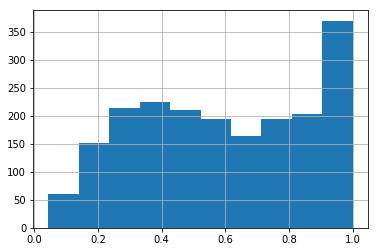

In [104]:
# print histogram
twitter_df["p1_conf"].hist();

#### Answer of the second question (p1_conf):

The distribution of the p1_conf data is left-skewed (negatively-skewed).

In [105]:
# find value
maxi = twitter_df["p1_conf"].max()
twitter_df[twitter_df.p1_conf == maxi]["name"]

631      Buddy
695       None
764      Lenox
1841      None
1884    Shaggy
Name: name, dtype: object

#### Answer of the third question (p1_conf):

The dog names with the highest true prediction rates of p1_conf are Buddy, Lenox and Shaggy. Additionally, some "None" values were found.

In [106]:
# calculate statistics
twitter_df["p2_conf"].describe()

count    1989.000000
mean        0.134364
std         0.100641
min         0.000000
25%         0.053900
50%         0.117500
75%         0.194900
max         0.488000
Name: p2_conf, dtype: float64

In [107]:
# calculate mean
twitter_df["p2_conf"].mean()

0.13436420311714425

In [108]:
# calculate median
twitter_df["p2_conf"].median()

0.1175

In [109]:
# calculate max
twitter_df["p2_conf"].max()

0.488

#### Answer of the first question (p2_conf):

The mean of the p2-confident is 0.13436420311714425 and the median is 0.1175.

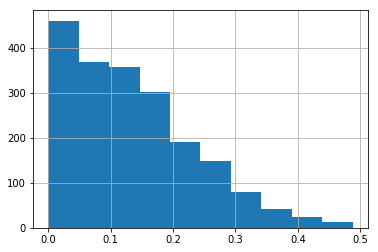

In [110]:
# print histogram
twitter_df["p2_conf"].hist();

#### Answer of the second question (p2_conf):

The distribution of the p2_conf data is right-skewed (positively-skewed).

In [111]:
# find value
maxi2 = twitter_df["p2_conf"].max()
twitter_df[twitter_df.p2_conf == maxi2]["name"]

1006    Jiminus
Name: name, dtype: object

#### Answer of the third question (p2_conf):

The dog name with the highest true prediction rate of p2_conf is Jiminus.

In [112]:
# calculate statistics
twitter_df["p3_conf"].describe()

count    1989.000000
mean        0.060217
std         0.050797
min         0.000000
25%         0.016100
50%         0.049500
75%         0.091600
max         0.273400
Name: p3_conf, dtype: float64

In [113]:
# calculate mean
twitter_df["p3_conf"].mean()

0.06021704374057313

In [114]:
# calculate median
twitter_df["p3_conf"].median()

0.0495

In [115]:
# calculate max
twitter_df["p3_conf"].max()

0.2734

#### Answer of the first question (p3_conf):

The mean of the p3-confident is 0.06021704374057313 and the median is 0.0495.

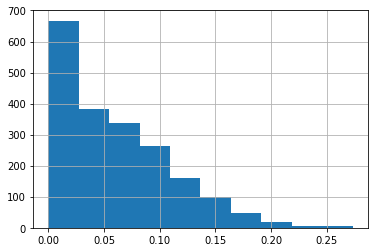

In [116]:
# print histogram
twitter_df["p3_conf"].hist();

#### Answer of the second question (p3_conf):

The distribution of the p3_conf data is right skewed (positively-skewed).

In [117]:
# find value
maxi3 = twitter_df["p3_conf"].max()
twitter_df[twitter_df.p3_conf == maxi3]["name"]

922    Bluebert
Name: name, dtype: object

#### Answer of the third question (p3_conf):

The dog name with the highest true prediction rate of p3_conf is Bluebert.

#### Conclusion

In summary, we clarified that the higher probabilities of true predictions were found in the dataset of p1_conf. Furthermore, the histograms showed that the data of p1_conf were very well distributed in comparison to p2_conf and p3_conf. The maximum value of p1_conf was found at the value of 1.0. There exist several dog names (Buddy, Lenox and Shaggy) with the highest true prediction rate of p1_conf. 

### Visualizing dataset

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


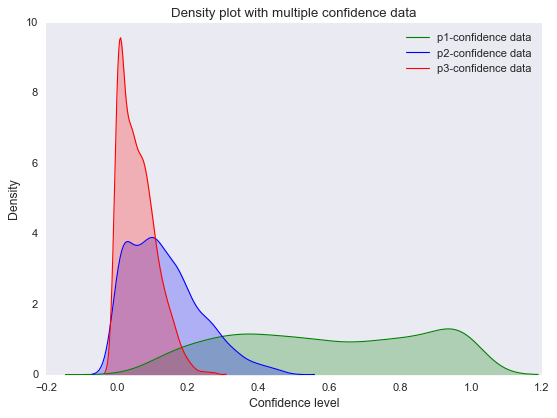

In [142]:
# plot three histograms with matplotlib and seaborn
sns.distplot(twitter_df["p1_conf"], hist=False, kde=True, color="green", label="p1-confidence data", kde_kws = {'shade': True, 'linewidth': 1})
sns.distplot(twitter_df["p2_conf"], hist=False, kde=True, color="blue", label="p2-confidence data", kde_kws = {'shade': True, 'linewidth': 1})
sns.distplot(twitter_df["p3_conf"], hist=False, kde=True, color="red", label="p3-confidence data", kde_kws = {'shade': True, 'linewidth': 1})

plt.style.use('seaborn-dark')
plt.title('Density plot with multiple confidence data')
plt.xlabel('Confidence level')
plt.ylabel('Density')
plt.savefig('confidence_histograms.png')
plt.legend()
plt.show()

#### References

- https://stackoverflow.com/questions/50633935/pandas-replace-all-strings-in-lowercase-in-a-column-with-none
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html
- https://stackoverflow.com/questions/14320909/efficiently-checking-that-string-consists-of-one-character-in-python
- https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-dataframe-in-pandas-python
- https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
- https://python-graph-gallery.com/25-histogram-with-several-variables-seaborn/
- https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0